Renata Aqila R P - 2702244284

Farren Angelica D - 2702243546

Naira Faizanoor - 2702241465

Vionita Lesia - 2702238312


### A. Introduction about the topic

Data Science adalah ilmu yang mempelajari data dalam jumlah besar untuk menemukan pola dan membuat prediksi. Ilmu yang dipelajari seperti statistik, matematika, bisnis, dan ilmu komputer. Beberapa tahun belakangan ini, data science sangat berkembang pesat dan semakin banyak diminati oleh orang-orang karena peluang karier yang menguntungkan di seluruh dunia. Dengan permintaan yang terus meningkat untuk data scientist, penting untuk memahami trend gaji di data science. Dataset ini memberikan data gaji untuk data scientist pada tahun 2023 yang mencakup berbagai faktor seperti work year, experience level, employment type, job title, salary, salary currency, employee residence, remote ratio, company location, dan company size. Dengan kita menganalisis faktor-faktor ini, kita mendapatkan wawasan tentang distribusi gaji di data science.

### B. Dataset description

Dataset 2023 Data Scientists Salary mengandung informasi yang relevan tentang data scientist. Berikut variabel-variablenya:

    - work_year: Tahun gaji dibayarkan 
    
    - experience_level: Tingkat pengalaman dalam pekerjaan selama tahun tersebut (cth: entry-level, mid-level, senior-level, executive-level). 
    
    - employment_type: Jenis pekerjaan untuk peran tersebut (cth: part-time, full-time, contract, freelance) 
    
    - job_title: Peran yang dijalani selama tahun tersebut. 
    
    - salary: Jumlah total gaji kotor yang dibayarkan. 
    
    - salary_currency: Mata uang gaji yang dibayarkan. 
    
    - salary_in_usd: Gaji dalam USD. 
    
    - employee_residence: Negara tempat tinggal utama karyawan selama tahun tersebut. 
    
    - remote_ratio: Jumlah keseluruhan pekerjaan yang dilakukan dari jarak jauh. 
    
    - company_location: Negara kantor utama pemberi kerja atau cabang kontrak. 
    
    - company_size: Jumlah rata-rata orang yang bekerja untuk perusahaan selama tahun tersebut.

### C. Exploratory Data Analysis (EDA) & Pre-processing

In [1]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr, spearmanr, shapiro
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

SEED = 123
np.random.seed(SEED)


In [3]:
df = pd.read_csv('D:/Sekolah/binus/SEM 3/Machine Learning/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Menampilkan 5 baris pertama dari dataset Data Scientist Salary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Menampilkan informasi singkat mengenai nama kolom, jumlah kolom, jumlah data, jumlah nilai non-null di setiap kolom, dan penggunaan memori dataframe pada dataset Data Scientist Salary

In [5]:
df.shape

(3755, 11)

Menampilkan ukuran dimensi dari df yaitu 3755 baris dan 11 kolom

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Menampilkan output yaitu jumlah missing value. Hasilnya adalah setiap variabel di dataset ini tidak memiliki missing value / nilai kosong

In [7]:
categorical_cols = []
numerical_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_cols.append(i)
    else:
        categorical_cols.append(i)

print(f'Categorical: {categorical_cols}')
print(f'Numeric: {numerical_cols}')

Categorical: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Numeric: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


Menampilkan 2 kategori yaitu kategori Categorical dan kategori Numerical yang dimana Categorical berisi tipe data yang bukan numerik seperti job title, experience level, company location dll. Sedangkan Numerical berisi tipe data yang numerik seperti work year, salary dll

In [8]:
for i in categorical_cols:
    print(df[i].value_counts(),'\n')

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64 

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64 

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64 

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64 

US    3004
GB     167
CA     

Menampilkan variabel apa saja yang berada di kategori Categorical, jumlah dari masing-masing variabel tersebut, dan tipe datanya

In [9]:
for i in numerical_cols:
    print(df[i].value_counts(),'\n')

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64 

100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: salary, Length: 815, dtype: int64 

100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: salary_in_usd, Length: 1035, dtype: int64 

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64 



Menampilkan variabel apa saja yang berada di kategori Numerical, jumlah dari masing-masing variabel tersebut, dan tipe datanya

In [10]:
df.duplicated().sum()

1171

In [11]:
df = df.drop_duplicates().reset_index(drop = True)

In [12]:
df[categorical_cols].describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,2584,2584,2584,2584,2584,2584,2584
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,1554,2547,598,2107,1893,1929,2028


Menampilkan total data, jumlah nilai unik (berbeda), nilai yang paling sering muncul, dan total kemunculan nilai yang paling sering muncul di setiap kolom variabel Categorical

In [13]:
df[numerical_cols].describe()

# Bisa menggunakan syntax lain seperti:
#        df['work_year'].unique() 
# -> untuk menampilkan jumlah nilai unik dan tipe datanya

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Menampilkan total data, nilai rata-rata, nilai standar deviasi, nilai minimum, nilai kuartil pertama, kedua dan ketiga, serta nilai maksimum di setiap kolom variabel Numerical

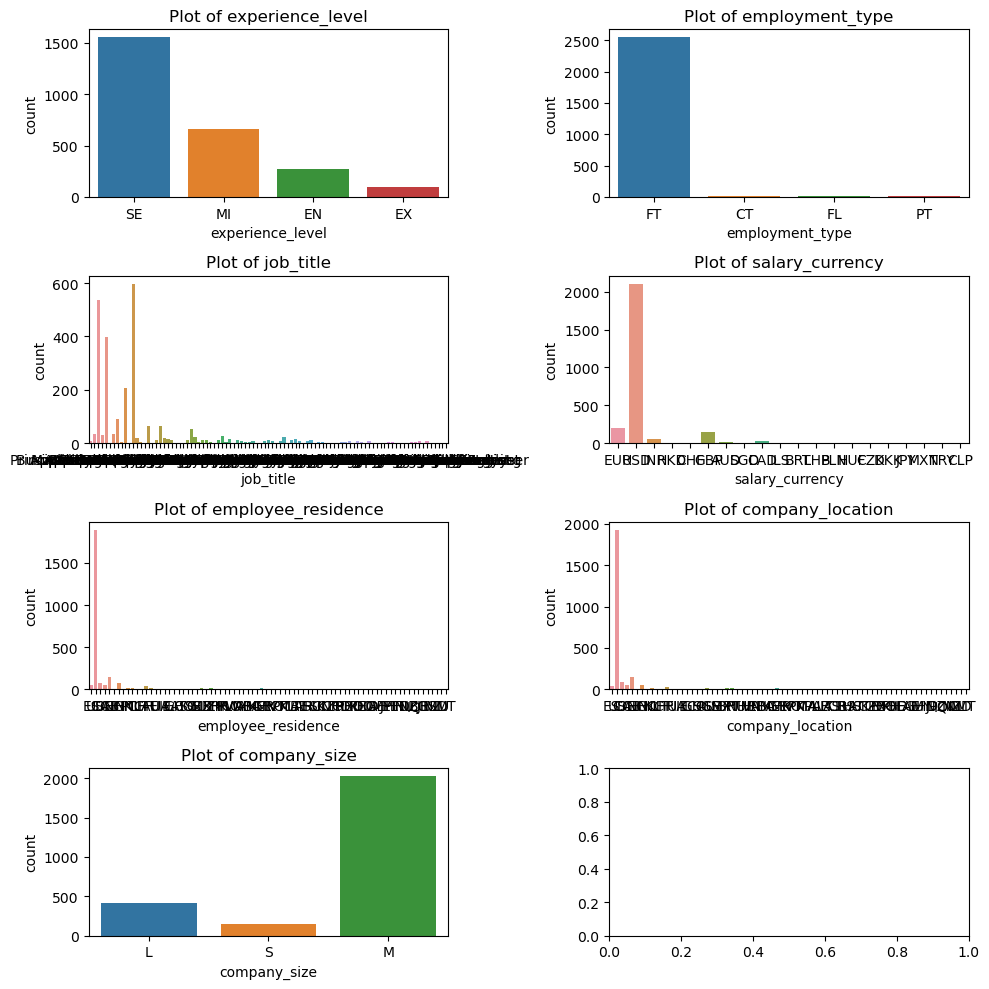

In [14]:
category = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
fig, axes = plt.subplots(4, 2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(category):
    sns.countplot(x = col, data=df, ax=axes[i])
    axes[i].set_title(f'Plot of {col}')
    
plt.tight_layout()
plt.show()

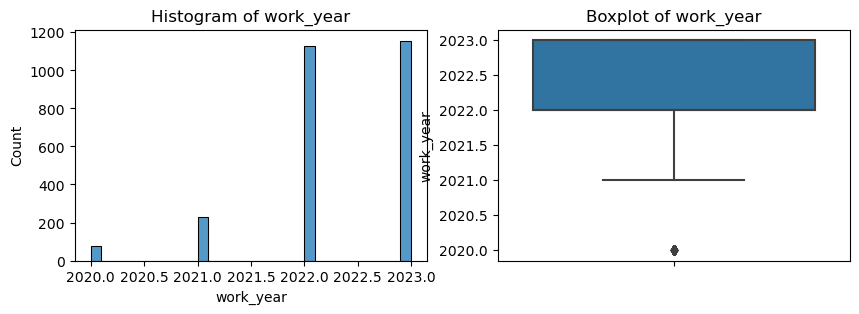

Skewness: -0.9693486491821657
Kurtosis: 0.7427049678476272


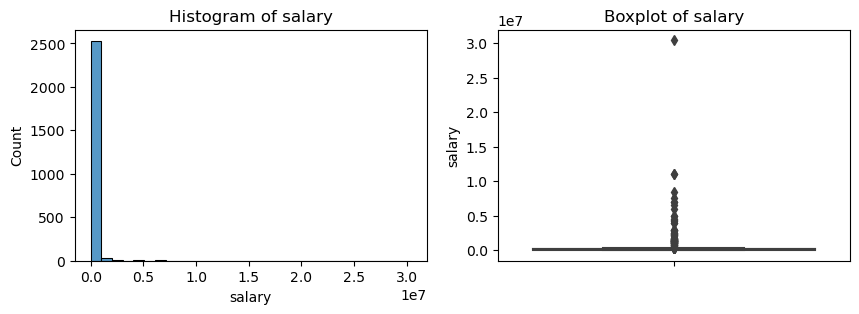

Skewness: 24.088573556195946
Kurtosis: 793.5793501431554


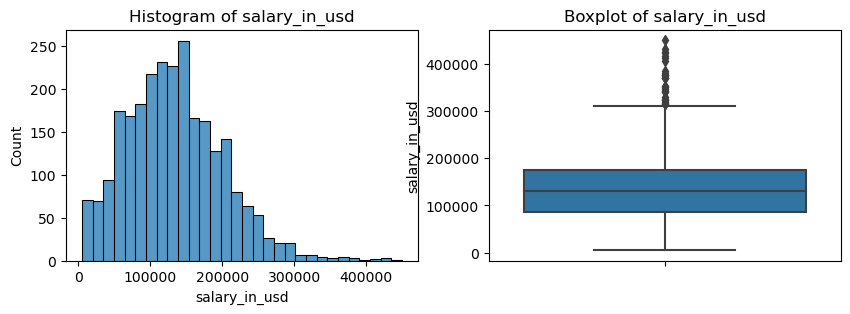

Skewness: 0.6203168790580038
Kurtosis: 0.8269400876861832


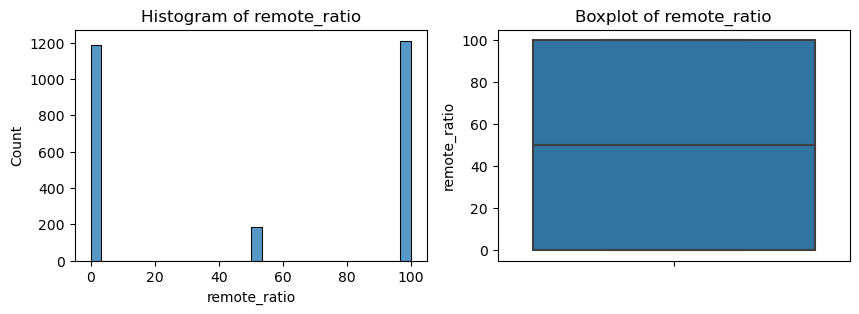

Skewness: -0.01931889440725452
Kurtosis: -1.9229957652422922


In [15]:
numerical = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        #histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        #boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df, numerical_cols)

Menampilkan visualisasi distribusi dan outlier pada setiap kolom di kategori Numerical. Dan juga menampilkan hasil perhitungan skewness dan kurtosis.

In [16]:
def detect_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            print(f"Outliers in {col}:\n", outliers[[col]].head(), "\n")
        else:
            print(f"No outliers detected in {col}\n")

detect_outliers_iqr(df, numerical_cols)

Outliers in work_year:
       work_year
171        2020
1435       2020
2056       2020
2066       2020
2087       2020 

Outliers in salary:
       salary
33    342810
41   1650000
80    510000
131   342300
152  1700000 

Outliers in salary_in_usd:
      salary_in_usd
33          342810
131         342300
143         318300
207         329500
392         353200 

No outliers detected in remote_ratio



Menampilkan outliers dari variabel numerical

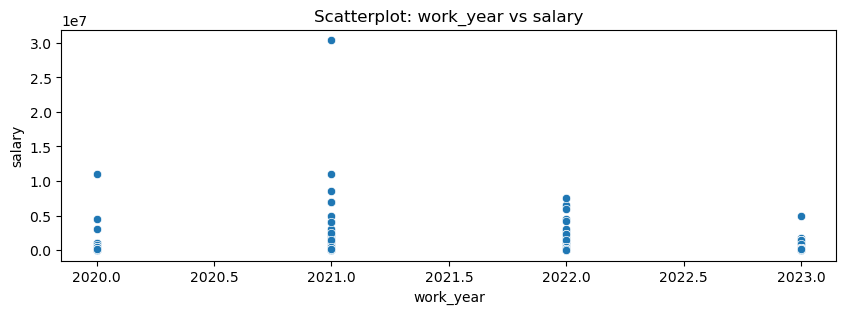

Spearman's R between work_year and salary: 0.1419 (p-value: 0.0000)
Number of NaNs in work_year: 0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def check_correlation(df_in, x_col, y_col):
    df = df_in.copy()
    df = df.dropna(subset=[x_col, y_col])
    
    plt.figure(figsize=(10, 3))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    spearman_corr, p_value = spearmanr(df[x_col], df[y_col])
    print(f"Spearman's R between {x_col} and {y_col}: {spearman_corr:.4f} (p-value: {p_value:.4f})")
    
    nan_count = df_in[x_col].isna().sum()
    print(f'Number of NaNs in {x_col}: {nan_count}')
    
check_correlation(df, x_col="work_year", y_col="salary")

Menampilkan korelasi antara variabel **work_year** dan **salary**. Dari tahun 2020-2022, salary meningkat dan pada tahun 2023, salary mulai menurun. Hal ini disebabkan karena pada tahun 2020-2022, banyak karyawan yang bekerja di bidang Data Scientist, sedangkan pada tahun 2023, mulai menurun jumlah karyawan yang bekerja di bidang Data Scientist


Spearman's R between experience_level and salary: 0.2985 (p-value: 0.0000)
Number of NaNs in experience_level: 0


C:\Users\Renata Aqila\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


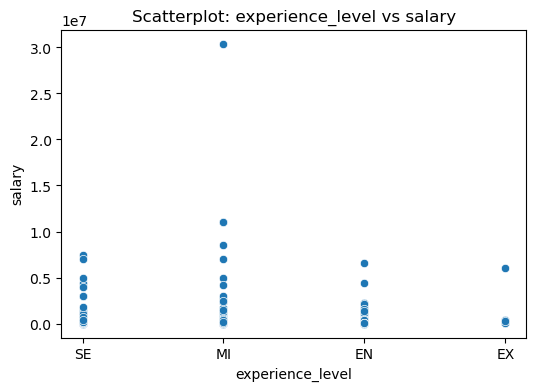

In [7]:
def check_correlation(df_in, x_col, y_col):
 
    df = df_in.copy()
    df = df.dropna(subset=[x_col, y_col])

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    spearman_corr, p_value = spearmanr(df[x_col], df[y_col])
    print(f"Spearman's R between {x_col} and {y_col}: {spearman_corr:.4f} (p-value: {p_value:.4f})")

    nan_count = df_in[x_col].isna().sum()
    print(f'Number of NaNs in {x_col}: {nan_count}')

check_correlation(df, x_col="experience_level", y_col="salary")

Menampilkan korelasi antara variabel **experience_level** dan **salary**. Hal ini dipengaruhi oleh beberapa perusahaan yang membutuhkan pekerja sesuai dengan bidang dan experience level yang dibutuhkan. Seperti contohnya, banyak jenis pekerjaan di bidang Data Science yang membutuhkan pekerja di **MI (Intermediate Level)**, sehingga itu berpengaruh pada uang yang dikeluarkan oleh perusahaan untuk menggaji karyawan.

C:\Users\Renata Aqila\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Spearman's R between salary and job_title: 0.1599 (p-value: 0.0000)
Number of NaNs in salary: 0


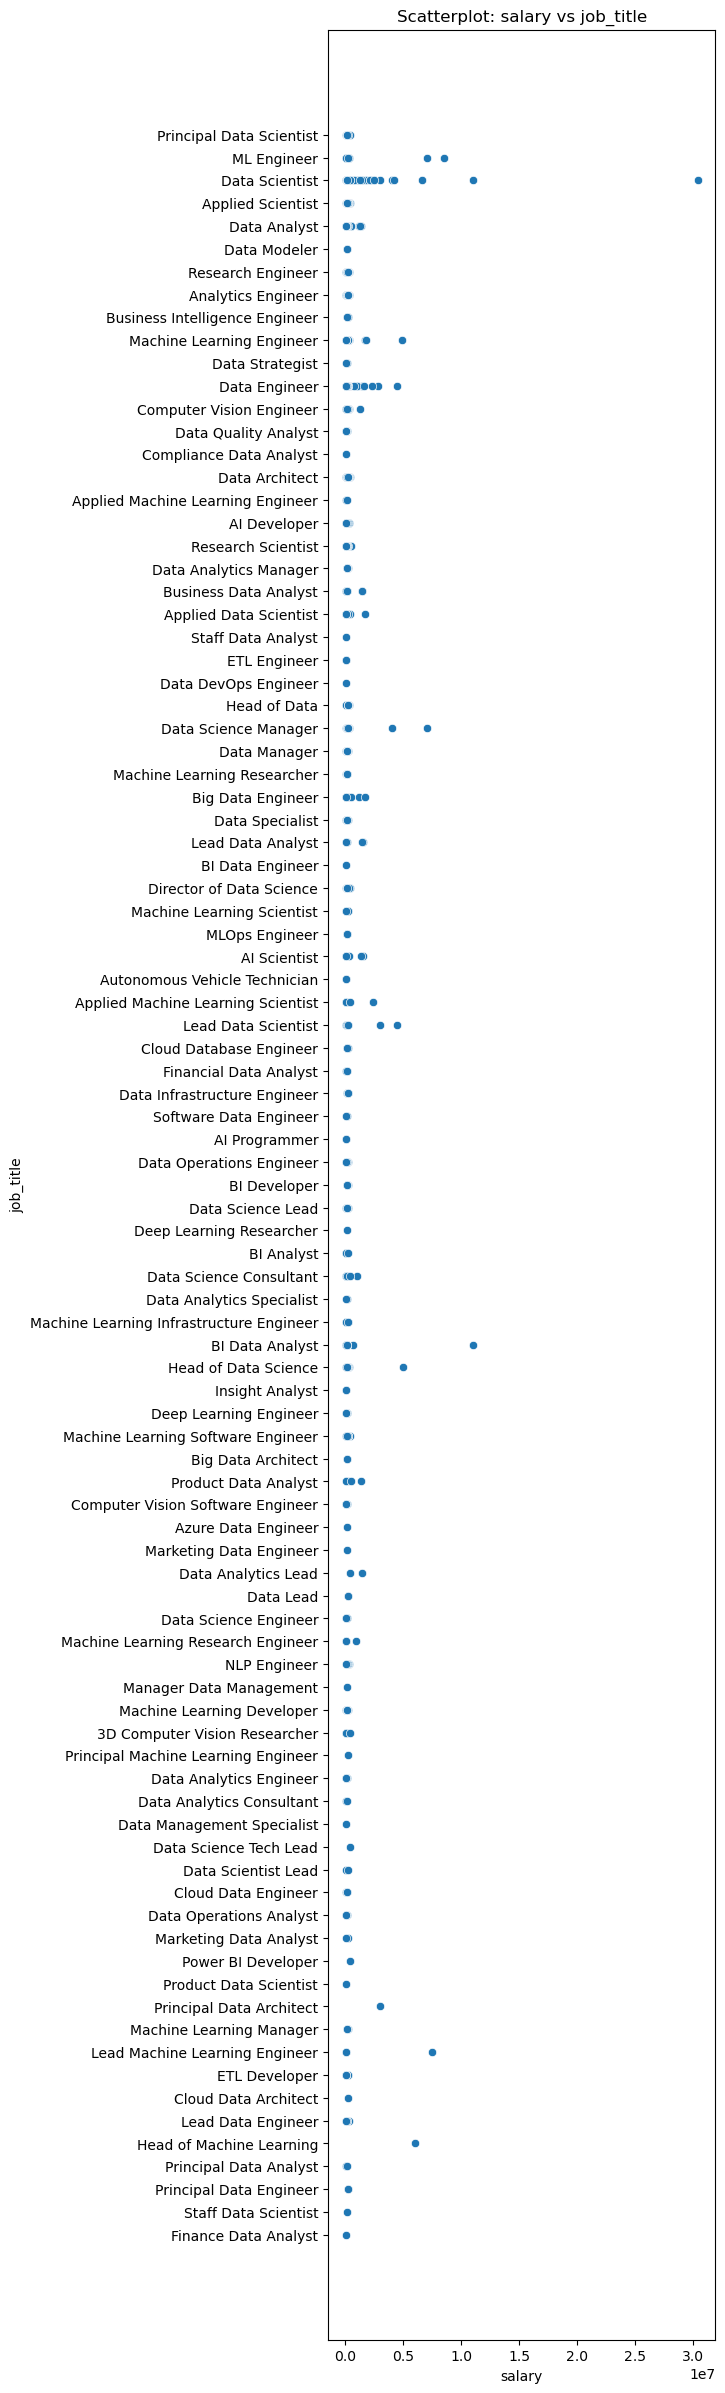

In [9]:
def check_correlation(df_in, x_col, y_col):
 
    df = df_in.copy()
    df = df.dropna(subset=[x_col, y_col])

    plt.figure(figsize=(5, 30))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    spearman_corr, p_value = spearmanr(df[x_col], df[y_col])
    print(f"Spearman's R between {x_col} and {y_col}: {spearman_corr:.4f} (p-value: {p_value:.4f})")

    nan_count = df_in[x_col].isna().sum()
    print(f'Number of NaNs in {x_col}: {nan_count}')

check_correlation(df, x_col="salary", y_col="job_title")

Menampilkan korelasi antara **job title** dan **salary**. Hal ini membantu untuk para pekerja agar bisa mengetahui jenis pekerjaan apa saja yang mendapatkan gaji yang tinggi. Seperti contohnya, bekerja di bidang **Data Scientist** bisa mendapatkan gaji lebih dari 300000 USD


### D. Feature Engineering

In [20]:
for i in numerical_cols:
    print(i, shapiro(df[i]))

work_year ShapiroResult(statistic=0.7727506756782532, pvalue=0.0)
salary ShapiroResult(statistic=0.10647118091583252, pvalue=0.0)
salary_in_usd ShapiroResult(statistic=0.9770117998123169, pvalue=5.2660996438593736e-20)
remote_ratio ShapiroResult(statistic=0.6806203126907349, pvalue=0.0)


Mengetahui apakah data numerical dalam dataset memenuhi asumsi distribusi normal, terutama untuk memilih uji statistik yang sesuai (parametrik atau non-parametrik) di analisis selanjutnya. Jika p-value > 0.05, tidak bisa menolak hipotesis nol bahwa data berasal dari distribusi normal (data dianggap normal). Jika p-value ≤ 0.05, menolak hipotesis nol, yang berarti data tidak berasal dari distribusi normal.

In [21]:
x = df[df.columns.drop(['salary_in_usd'])]
y = df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=123)
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}\n")

Training set shape: (2067, 10)
Test set shape: (517, 10)



Membagi dataset menjadi data training dan testing untuk memastikan model dapat diuji pada data yang belum pernah dilihat selama training, serta memeriksa dimensi data untuk memastikan pemisahan telah dilakukan dengan benar

In [22]:
from sklearn.preprocessing import OrdinalEncoder

custom_order_experience_level = ['EN', 'MI', 'SE', 'EX']
custom_order_employment_type = ['FT', 'PT', 'CT', 'FL']
custom_order_company_size = ['S', 'M', 'L']

filtered_data = df.copy()

ordinal_encoder_experience = OrdinalEncoder(categories=[custom_order_experience_level])
ordinal_encoder_employment = OrdinalEncoder(categories=[custom_order_employment_type])
ordinal_encoder_company_size = OrdinalEncoder(categories=[custom_order_company_size])

filtered_data['experience_level'] = ordinal_encoder_experience.fit_transform(filtered_data[['experience_level']]).astype(int)
filtered_data['employment_type'] = ordinal_encoder_employment.fit_transform(filtered_data[['employment_type']]).astype(int)
filtered_data['company_size'] = ordinal_encoder_company_size.fit_transform(filtered_data[['company_size']]).astype(int)

filtered_data = filtered_data.drop(columns=['company_location', 'employee_residence', 'job_title'])

filtered_data = pd.get_dummies(filtered_data, columns=['salary_currency'], drop_first=True)

filtered_data.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,...,salary_currency_HUF,salary_currency_ILS,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_THB,salary_currency_TRY,salary_currency_USD
0,2023,2,0,80000,85847,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,1,2,30000,30000,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2023,1,2,25500,25500,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2023,2,0,175000,175000,100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2023,2,0,120000,120000,100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Menghapus kolom yang tidak diperlukan untuk analisis, mengubah kategori non-ordinal menjadi format numerik agar dapat digunakan dalam model ML. Menghasilkan dataset yang siap untuk digunakan dalam ML

In [21]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

numerical = ['work_year', 'salary', 'remote_ratio']

#debugging
print(x_train.columns)
print(set(numerical).difference(x_train.columns)) 

#robustScaler
rob_scaler = RobustScaler()

#memastikan kolom ada sebelum transformasi
x_train[numerical] = rob_scaler.fit_transform(x_train[numerical])
x_test[numerical] = rob_scaler.transform(x_test[numerical])



Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')
set()


Memakai robust scaler karena data memiliki outlier yang signifikan serta kami ingin menskalakan data tanpa mempengaruhi nilai ekstrem secara drastis.

In [22]:
#Check which columns in your dataset are categorical.
categorical_columns = x_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
x = df.drop('salary_in_usd', axis=1)  
y = df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### E. Machine Learning Algorithm: Linear Regression

Menentukan model yang digunakan:
    1. Linear Regression (Baseline Model)
    2. Random Forest Regressor (Proposed Model)

Menggunakan linear regression karena:

- Algoritma yang paling dasar dan intuitif. Model ini bekerja dengan membuat hubungan linier antara variabel independen (input) dan variabel dependen (output)
- Algoritma dengan kompleksitas komputasi rendah, sehingga sangat cepat untuk diimplementasikan, terutama pada dataset kecil hingga menengah.
- Algoritma ini bekerja baik pada dataset dengan ukuran kecil hingga sedang, di mana model yang lebih kompleks mungkin tidak memberikan peningkatan signifikan dalam akurasi

In [23]:
#baseline model (Linear Regression)
baseline_model = LinearRegression()

#train model
baseline_model.fit(x_train, y_train)

#prediksi hasil dengan baseline model
y_train_pred_baseline = baseline_model.predict(x_train)
y_test_pred_baseline = baseline_model.predict(x_test)

#evaluasi baseline model
print("Training Results:")
print(f"MAE: {mae(y_train, y_train_pred_baseline):.4f}")
print(f"MSE: {mse(y_train, y_train_pred_baseline):.4f}")
print(f"RMSE: {mse(y_train, y_train_pred_baseline, squared=False):.4f}")
print(f"R2: {r2(y_train, y_train_pred_baseline):.4f}")
print("\nTesting Results:")
print(f"MAE: {mae(y_test, y_test_pred_baseline):.4f}")
print(f"MSE: {mse(y_test, y_test_pred_baseline):.4f}")
print(f"RMSE: {mse(y_test, y_test_pred_baseline, squared=False):.4f}")
print(f"R2: {r2(y_test, y_test_pred_baseline):.4f}")

Training Results:
MAE: 42572.5879
MSE: 3160764674.5009
RMSE: 56220.6784
R2: 0.3035

Testing Results:
MAE: 43601.9997
MSE: 3103590386.3110
RMSE: 55709.8769
R2: 0.2905


In [24]:
#hasil evaluasi baseline untuk analisis
baseline = {
    "Model": "Linear Regression",
    "Training MAE": mae(y_train, y_train_pred_baseline),
    "Training MSE": mse(y_train, y_train_pred_baseline),
    "Training RMSE": mse(y_train, y_train_pred_baseline, squared=False),
    "Training R²": r2(y_train, y_train_pred_baseline),
    "Testing MAE": mae(y_test, y_test_pred_baseline),
    "Testing MSE": mse(y_test, y_test_pred_baseline),
    "Testing RMSE": mse(y_test, y_test_pred_baseline, squared=False),
    "Testing R²": r2(y_test, y_test_pred_baseline)
}

Analysis of the results

A. Performance observations:
1. The model performs poorly overall but generalizes reasonably well, as shown by the small difference between training and testing metrics.
2. The low R^2 values (<0.5) indicate that the underlying relationships between the target variable and characteristics are not being well captured by linear regression. The existence of non-linear patterns or interactions in the data may be the cause of this.

B. Error implications:
1. High MAE and RMSE values in comparison to the target salary show that the model has trouble making accurate predictions, most often as a result of unmodeled complexity or outliers.
2. The tight correspondence between testing and training errors indicates that the model is underfitting rather than overfitting, as it is unable to properly adjust for the variation in pay.


In [25]:
#proposed model (Random Forest Regressor)
proposed_model = RandomForestRegressor(n_estimators=100, random_state=SEED)

#melatih model
proposed_model.fit(x_train, y_train)

#prediksi hasil dengan proposed model
y_train_pred_proposed = proposed_model.predict(x_train)
y_test_pred_proposed = proposed_model.predict(x_test)

#evaluasi proposed model
print("\nProposed Model Evaluation:")
print("Training Results:")
print(f"MAE: {mae(y_train, y_train_pred_proposed):.4f}")
print(f"MSE: {mse(y_train, y_train_pred_proposed):.4f}")
print(f"RMSE: {mse(y_train, y_train_pred_proposed, squared=False):.4f}")
print(f"R2: {r2(y_train, y_train_pred_proposed):.4f}")
print("\nTesting Results:")
print(f"MAE: {mae(y_test, y_test_pred_proposed):.4f}")
print(f"MSE: {mse(y_test, y_test_pred_proposed):.4f}")
print(f"RMSE: {mse(y_test, y_test_pred_proposed, squared=False):.4f}")
print(f"R2: {r2(y_test, y_test_pred_proposed):.4f}")


Proposed Model Evaluation:
Training Results:
MAE: 785.5695
MSE: 22854766.2229
RMSE: 4780.6659
R2: 0.9950

Testing Results:
MAE: 1966.0524
MSE: 198054138.0149
RMSE: 14073.1709
R2: 0.9547


In [26]:
#hasil evaluasi proposed untuk analisis
proposed = {
    "Model": "Random Forest Regressor",
    "Training MAE": mae(y_train, y_train_pred_proposed),
    "Training MSE": mse(y_train, y_train_pred_proposed),
    "Training RMSE": mse(y_train, y_train_pred_proposed, squared=False),
    "Training R2": r2(y_train, y_train_pred_proposed),
    "Testing MAE": mae(y_test, y_test_pred_proposed),
    "Testing MSE": mse(y_test, y_test_pred_proposed),
    "Testing RMSE": mse(y_test, y_test_pred_proposed, squared=False),
    "Testing R2": r2(y_test, y_test_pred_proposed)
}

Analysis of the results

A. Performance observations:
1. The suggested model (random forest) shows its capacity to handle non-linear correlations in the data by outperforming the baseline model (linear regression) on all evaluation measures, especially in R^2, MAE, and RMSE.
2. The model appears to generalize well without experiencing significant overfitting, as shown by the small difference between training and testing metrics.

B. Strengths of random forest:
1. Its ensemble method, which combines several decision trees, helps in identifying complex patterns within the data.
2. Because of bootstrapping and averaging, it is less risky for overfitting and resilient to outliers.

In [27]:
#perbandingan hasil antara baseline model dan proposed model
pd.DataFrame([baseline, proposed])

,Model,Training MAE,Training MSE,Training RMSE,Training R²,Testing MAE,Testing MSE,Testing RMSE,Testing R²,Training R2,Testing R2
0,Linear Regression,42572.587863,3.160765e+09,56220.678353,0.303548,43601.999747,3.103590e+09,55709.876919,0.290457,NaN,NaN
1,Random Forest Regressor,785.569473,2.285477e+07,4780.665877,NaN,1966.052437,1.980541e+08,14073.170859,NaN,0.994964,0.954721


A. Existing challenges

1. High Testing Errors: 
- Although overall performance was high, the testing RMSE (~14,073) shows that several predicts were far off.

2. Feature Complexity: 
- If high-cardinality categorical features are not managed well, they may weaken the model's performance.
- It's possible that characteristics and the target variable have undiscovered relationships.

3. Overfitting Potential: 
- The training R^2 (0.9950) is much higher than the testing R^2 (0.9547), suggesting a small but controllable overfit.

4. Interpretability: 
- Random forest offers feature importance, but it is less transparent than simpler models, which makes it more difficult to understand certain decision-making procedures.


B. Possible future works

1. Improved feature engineering:
- Reducing high-cardinality categories: To improve model performance, group uncommon categories in features like job_title or employee_residence.
- Interaction characteristics: To capture challenging relationships, investigate and incorporate polynomial characteristics or interaction terms.
- Outlier handling: Use robust transformations or statistical techniques to identify and reduce outliers in salary_in_usd.

2. Hyperparameter tuning: To improve performance, use GridSearchCV or RandomizedSearchCV to optimize random forest hyperparameters (such as n_estimators, max_depth, and min_samples_split).


3. Testing additional algorithms: 
- Experiment with advanced models like XGBoost, which often outperform Random Forest in datasets with high-cardinality categorical variables.
- For additional accuracy gains, compare performance with ensemble models such as blending or stacking.
